In [7]:
!pip install --user --no-cache-dir featurewiz 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from featurewiz import featurewiz

In [3]:
data = pd.read_csv('D:\\LifeSpark Technology\\freezing_features_data.csv', index_col = False)

In [4]:
data

,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,ax_std,ay_std,az_std,gx_std,...,gx_argmin_fft,gy_argmin_fft,gz_argmin_fft,ax_arg_diff_fft,ay_arg_diff_fft,az_arg_diff_fft,gx_arg_diff_fft,gy_arg_diff_fft,gz_arg_diff_fft,freezing
0,-3.864977,-9.006687,-1.485871,0.112266,-0.059231,-0.196236,0.222749,0.168829,0.292033,0.031987,...,3,7,6,5,1,2,3,7,6,0.0
1,-3.232684,-9.236184,-1.294846,0.069561,0.023913,-0.162579,0.294334,0.200533,0.276320,0.050695,...,3,4,2,7,5,6,3,4,2,0.0
2,-2.923959,-9.372053,-1.143582,0.060920,-0.020895,-0.082895,0.230433,0.173127,0.427914,0.039659,...,7,13,7,6,7,3,7,13,7,0.0
3,-2.461005,-9.661547,-0.485434,0.124401,0.037993,-0.135318,0.343402,0.150970,0.249240,0.037625,...,7,11,7,4,3,7,7,11,7,0.0
4,-2.054283,-9.675075,-0.480922,0.034672,0.024241,-0.143350,0.211664,0.197131,0.259499,0.048265,...,5,2,10,7,5,10,5,2,10,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23361,-2.558189,-9.919188,0.174403,-0.053694,-0.082428,0.077802,3.164930,0.804081,0.977784,0.167869,...,4,3,13,4,8,6,4,3,13,0.0
23362,-2.410911,-10.010246,-0.116863,-0.068232,-0.082502,-0.034214,2.842122,0.595546,1.092538,0.148877,...,8,2,14,3,4,6,8,2,14,0.0
23363,-2.330894,-9.920939,-0.300702,0.046907,0.115678,0.101203,0.912711,0.301039,0.599585,0.068671,...,8,2,4,3,5,5,8,2,4,0.0
23364,-2.691798,-9.676980,0.091463,0.016237,-0.024063,0.127972,0.523223,0.241485,0.148682,0.044089,...,5,7,7,7,7,5,5,7,7,0.0


In [5]:
X_full = data.drop(['freezing'],axis=1)
 
y_full = data.freezing.values 

In [6]:
X_scaled_full =  StandardScaler().fit_transform(X_full)

X_train, X_rem, y_train, y_rem = train_test_split(X_scaled_full,y_full,stratify = y_full, train_size=0.6, random_state = 861)



In [7]:
X_train.shape

(14019, 224)

In [8]:
classifier_full = RandomForestClassifier()
classifier_full.fit(X_train,y_train)

RandomForestClassifier()

In [11]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

accuracy score: 0.8443350807745801


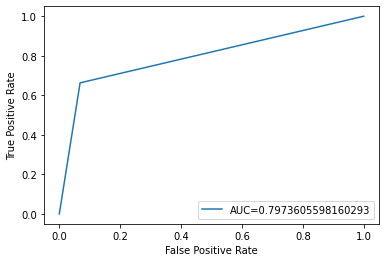

In [12]:
preds_val = classifier_full.predict(X_rem)
print('accuracy score: '+ str(accuracy_score(preds_val, y_rem)))
fpr, tpr, _ = roc_curve(y_rem,  preds_val)
auc = roc_auc_score(y_rem, preds_val)
    #create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
**INFO: featurewiz can now read feather formatted files. Loading train data...
    Shape of your Data Set loaded: (23366, 225)
    Loaded train data. Shape = (23366, 225)
No test data filename given...
Classifying features using a random sample of 10000 rows from dataset...
#### Single_Label Binary_Classification problem ####
    loading a random sample of 10000 rows into pandas for EDA
#######################################################################################
##############

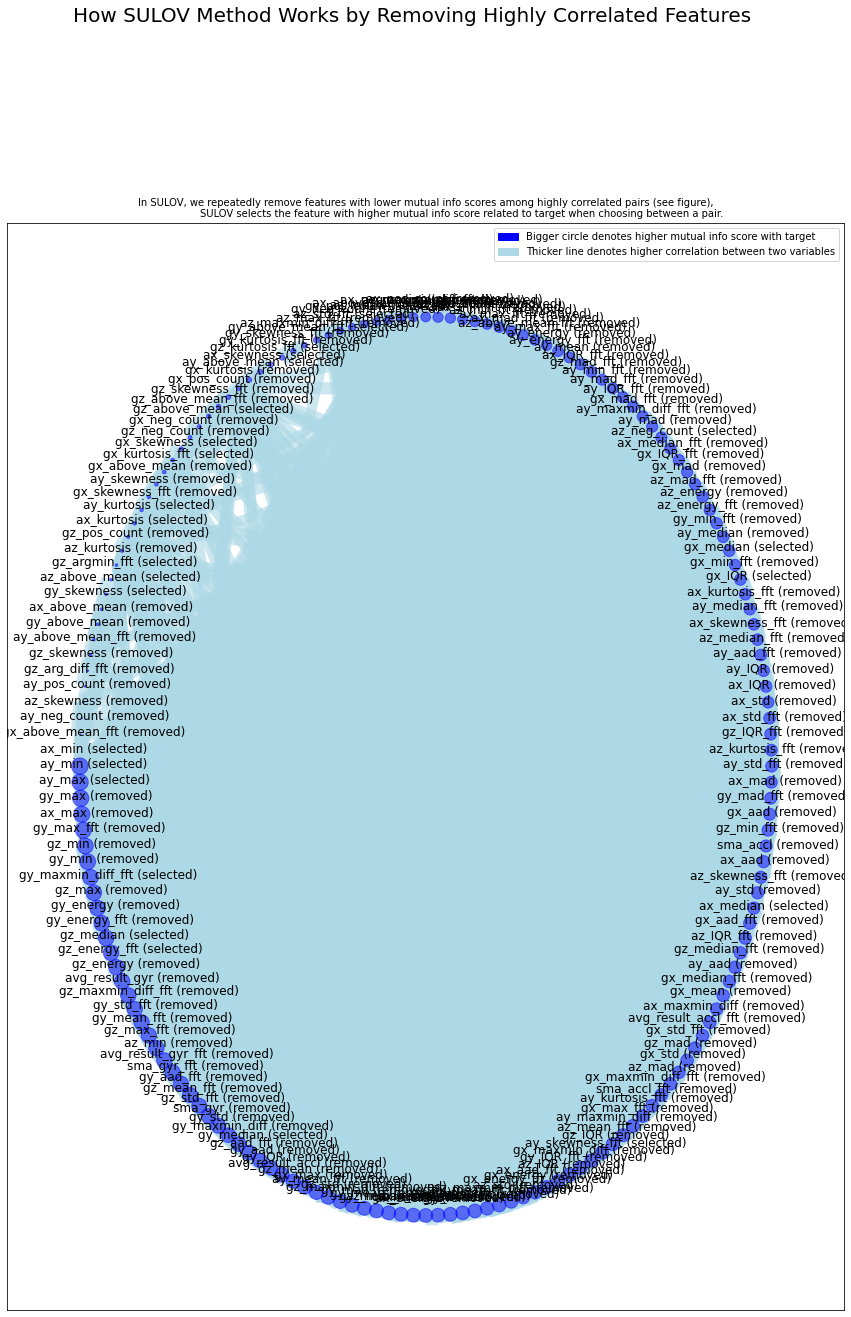

Time taken for SULOV method = 48 seconds
    Adding 0 categorical variables to reduced numeric variables  of 69
Final list of selected vars after SULOV = 69
Readying dataset for Recursive XGBoost by converting all features to numeric...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Train and Test loaded into Dask dataframes successfully after feature_engg completed
Current number of predictors = 69 
    XGBoost version: 1.6.1
Number of booster rounds = 100
        using 69 variables...
            Time taken for regular XGBoost feature selection = 9 seconds
        using 55 variables...
            Time taken for regular XGBoost feature selection = 18 seconds
        using 41 variables...
            Time taken for regular XGBoost feature selecti

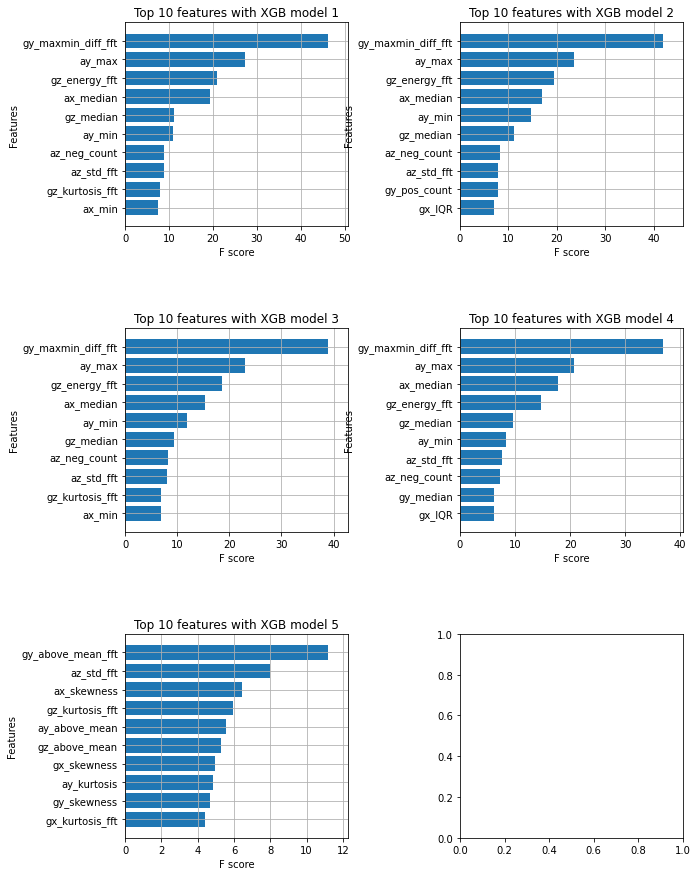

            Total time taken for XGBoost feature selection = 41 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 51 important features. Too many to print...

    Time taken for feature selection = 89 seconds
Returning 2 dataframes: dataname and test_data with 51 important features.


In [13]:
target = 'freezing'

features, train = featurewiz(data, target, corr_limit=0.45,verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")

In [14]:
print(features)

['gy_maxmin_diff_fft', 'ay_max', 'gz_energy_fft', 'ax_median', 'gz_median', 'ay_min', 'az_neg_count', 'az_std_fft', 'gz_kurtosis_fft', 'ax_min', 'gx_IQR', 'gy_pos_count', 'gy_peak_count', 'ay_arg_diff', 'az_peak_count', 'ay_peak_count', 'gy_median', 'gx_peak_count', 'ax_skewness', 'az_peak_count_fft', 'gz_peak_count', 'ax_above_mean_fft', 'ax_arg_diff', 'ay_argmin_fft', 'gx_kurtosis_fft', 'ax_peak_count', 'ay_skewness_fft', 'gz_kurtosis', 'gz_arg_diff', 'gx_peak_count_fft', 'gx_argmin', 'gx_median', 'gy_arg_diff', 'az_argmax', 'gx_arg_diff', 'ax_argmin_fft', 'ay_kurtosis', 'gz_argmin', 'gz_argmax', 'gz_above_mean', 'gy_skewness', 'ax_kurtosis', 'gx_skewness', 'az_arg_diff', 'az_argmin_fft', 'gy_argmin_fft', 'gx_argmin_fft', 'gz_argmin_fft', 'az_above_mean', 'gy_above_mean_fft', 'ay_above_mean']


In [15]:
arr = (list(features[:10]))
arr.append('freezing')

In [16]:
print(arr)

['gy_maxmin_diff_fft', 'ay_max', 'gz_energy_fft', 'ax_median', 'gz_median', 'ay_min', 'az_neg_count', 'az_std_fft', 'gz_kurtosis_fft', 'ax_min', 'freezing']


In [17]:
df_top10 = data[arr]
X_10 = df_top10.drop(['freezing'],axis=1)
 
y_10 = df_top10.freezing.values 

In [18]:
X_scaled =  StandardScaler().fit_transform(X_10)

In [19]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y_10,test_size = 0.4,stratify=y_10 , random_state = 861)

In [20]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train,y_train)

RandomForestClassifier()

accuracy score: 0.8322456403123997


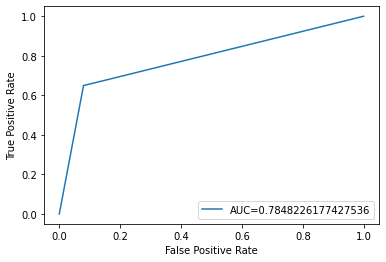

In [21]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
print('accuracy score: '+ str(accuracy_score(preds, y_valid)))
fpr, tpr, _ = roc_curve(y_valid,  preds)
auc = roc_auc_score(y_valid, preds)
    #create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [34]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_valid, preds)
print(cm)

In [22]:
#using top 50 features as returned by solov
features.append('freezing')
df_top50 = data[features]
X_50 = df_top50.drop(['freezing'],axis=1)
 
y_50 = df_top50.freezing.values 

X_scaled =  StandardScaler().fit_transform(X_50)

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled,y_50,test_size = 0.4,stratify=y_50 , random_state = 861)

In [24]:
classifier = RandomForestClassifier()

classifier.fit(X_train,y_train)

RandomForestClassifier()

accuracy score: 0.8240077030063122


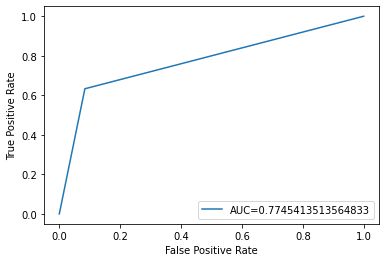

In [25]:
# make prediction 
preds = classifier.predict(X_valid) 
# check performance
print('accuracy score: '+ str(accuracy_score(preds, y_valid)))
fpr, tpr, _ = roc_curve(y_valid,  preds)
auc = roc_auc_score(y_valid, preds)
    #create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [35]:
cm = confusion_matrix(y_valid, preds)
print(cm)

[[5778  530]
 [1115 1924]]


In [26]:
import ppscore as pps

In [27]:
df_top10['freezing'] = df_top10['freezing'].astype(str)

In [28]:
p = pps.predictors(df_top10, "freezing")

In [29]:
p

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,ax_min,freezing,0.214969,classification,True,weighted F1,0.5624,0.656471,DecisionTreeClassifier()
1,ay_max,freezing,0.214356,classification,True,weighted F1,0.5624,0.656202,DecisionTreeClassifier()
2,gy_maxmin_diff_fft,freezing,0.209971,classification,True,weighted F1,0.5624,0.654283,DecisionTreeClassifier()
3,az_neg_count,freezing,0.205940,classification,True,weighted F1,0.5624,0.652519,DecisionTreeClassifier()
4,gz_median,freezing,0.204321,classification,True,weighted F1,0.5624,0.651811,DecisionTreeClassifier()
5,gz_energy_fft,freezing,0.193273,classification,True,weighted F1,0.5624,0.646976,DecisionTreeClassifier()
6,ay_min,freezing,0.190248,classification,True,weighted F1,0.5624,0.645652,DecisionTreeClassifier()
7,ax_median,freezing,0.096809,classification,True,weighted F1,0.5624,0.604764,DecisionTreeClassifier()
8,az_std_fft,freezing,0.056658,classification,True,weighted F1,0.5624,0.587193,DecisionTreeClassifier()
9,gz_kurtosis_fft,freezing,0.043298,classification,True,weighted F1,0.5624,0.581347,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

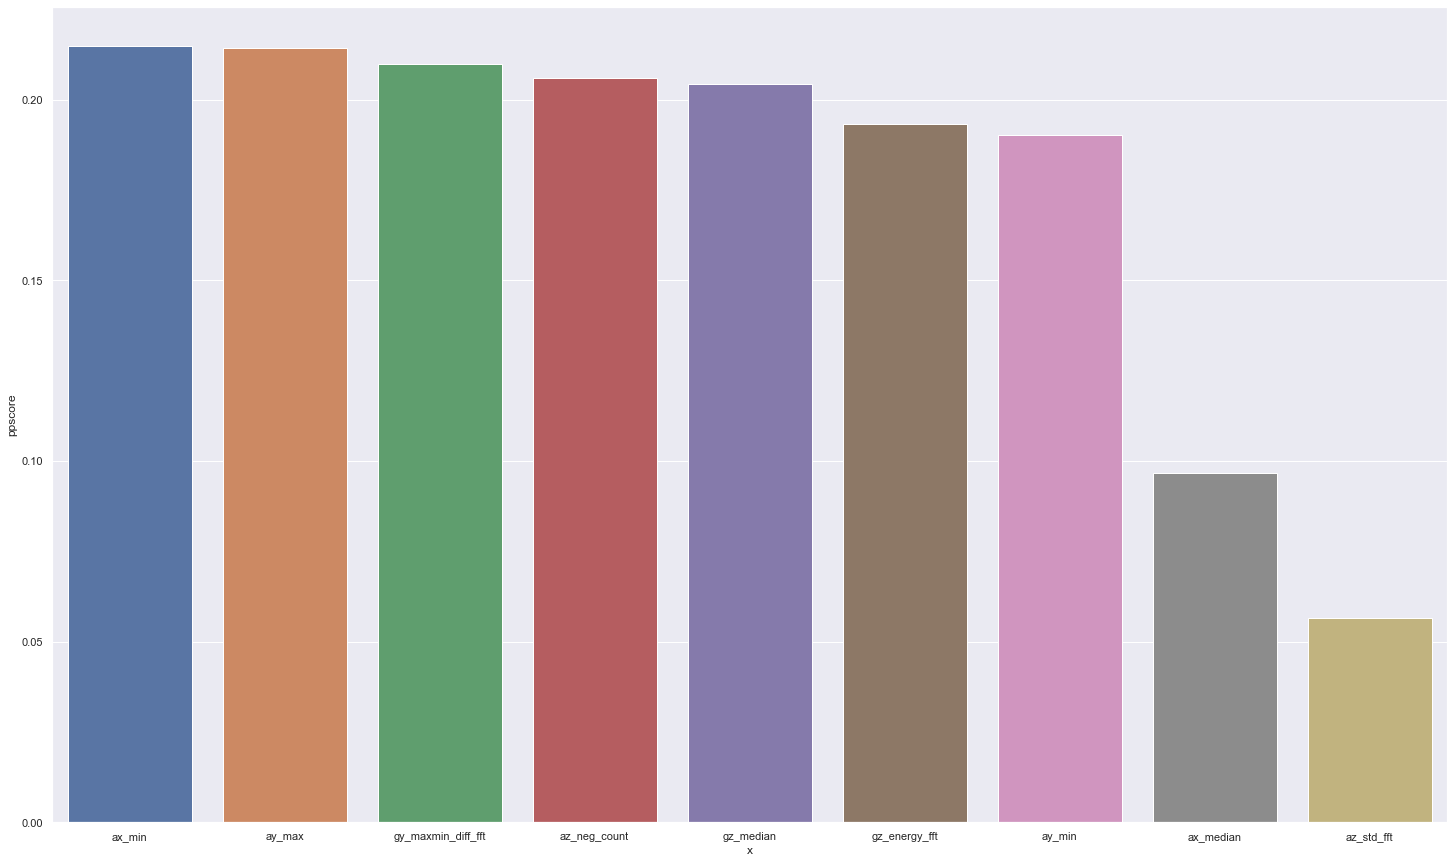

In [30]:
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(data=p[p['ppscore']>0.05], x="x", y="ppscore")

<AxesSubplot:xlabel='x', ylabel='y'>

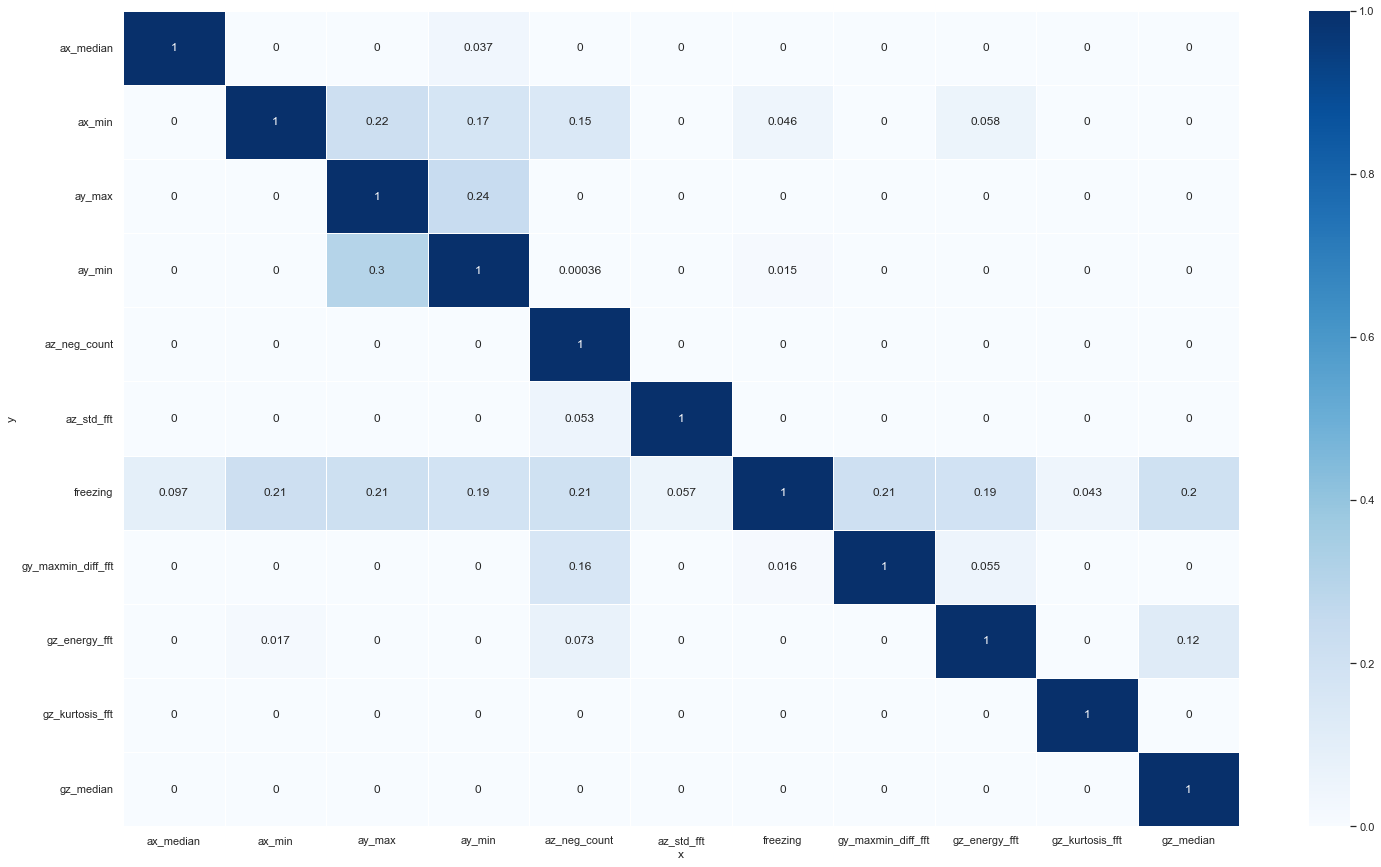

In [31]:
sns.set(rc={'figure.figsize':(25,15)})
matrix_df = pps.matrix(df_top10)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [32]:
#ppscore using top 50 features
df_top50['freezing'] = df_top50['freezing'].astype(str)
p_50 = pps.predictors(df_top50, "freezing")
p_50

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,ax_min,freezing,0.214969,classification,True,weighted F1,0.5624,0.656471,DecisionTreeClassifier()
1,ay_max,freezing,0.214356,classification,True,weighted F1,0.5624,0.656202,DecisionTreeClassifier()
2,gy_maxmin_diff_fft,freezing,0.209971,classification,True,weighted F1,0.5624,0.654283,DecisionTreeClassifier()
3,az_neg_count,freezing,0.205940,classification,True,weighted F1,0.5624,0.652519,DecisionTreeClassifier()
4,gz_median,freezing,0.204321,classification,True,weighted F1,0.5624,0.651811,DecisionTreeClassifier()
5,gy_median,freezing,0.199402,classification,True,weighted F1,0.5624,0.649658,DecisionTreeClassifier()
6,gz_energy_fft,freezing,0.193273,classification,True,weighted F1,0.5624,0.646976,DecisionTreeClassifier()
7,ay_min,freezing,0.190248,classification,True,weighted F1,0.5624,0.645652,DecisionTreeClassifier()
8,ay_skewness_fft,freezing,0.162752,classification,True,weighted F1,0.5624,0.633620,DecisionTreeClassifier()
9,gx_IQR,freezing,0.106526,classification,True,weighted F1,0.5624,0.609016,DecisionTreeClassifier()


<AxesSubplot:xlabel='x', ylabel='ppscore'>

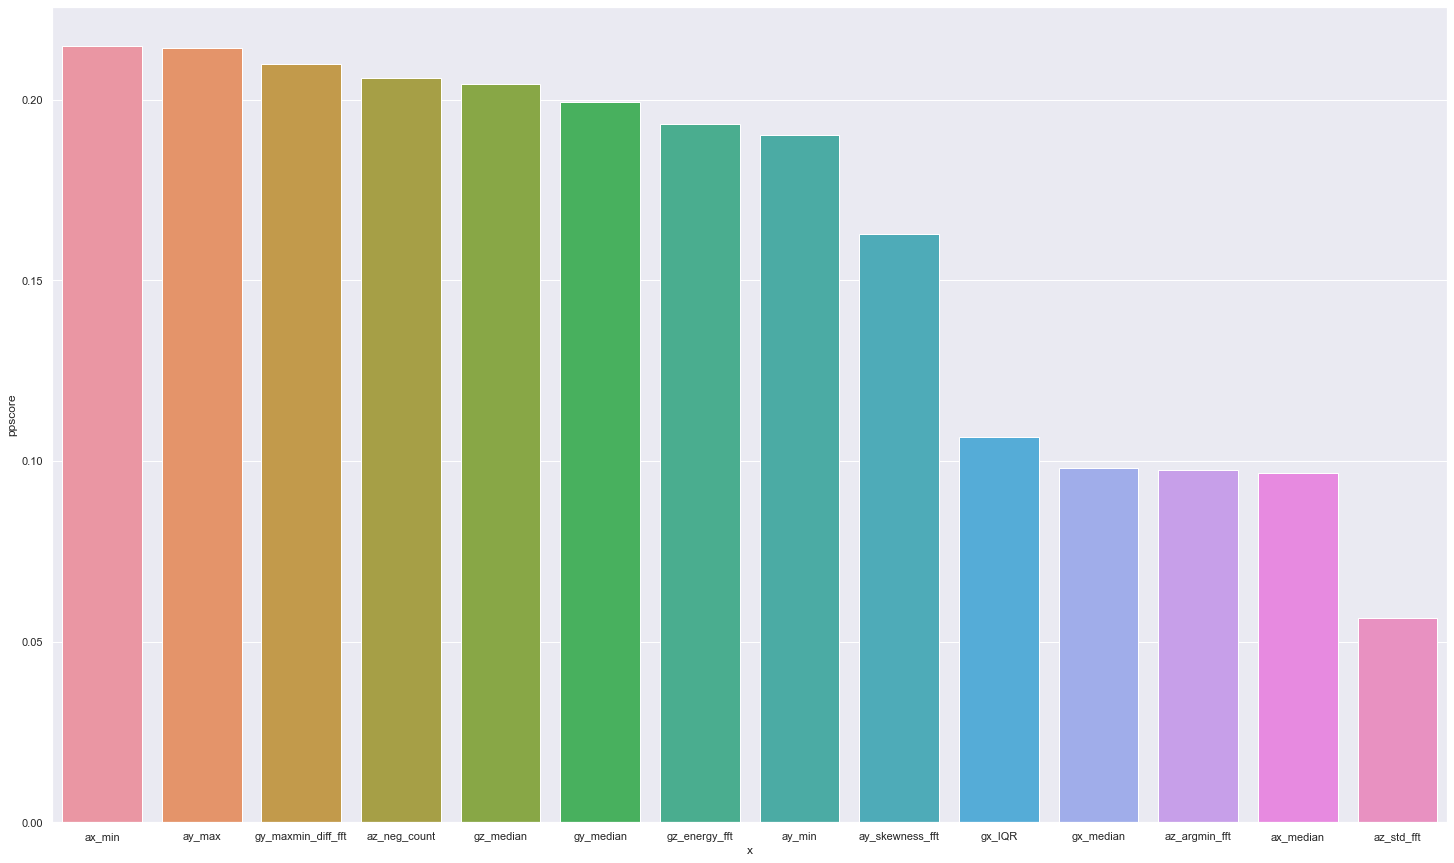

In [33]:
sns.set(rc={'figure.figsize':(25,15)})
sns.barplot(data=p_50[p_50['ppscore']>0.05], x="x", y="ppscore")